<a href="https://colab.research.google.com/github/roberwangunda/week_4_project_core/blob/master/Copy_of_Moringa_Data_Science_Core_W4_2020_09_Robert_Wang'unda_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data understanding

In [ ]:
# importing our libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# reading  our dataset
autolib_events = pd.read_csv("autolib_daily_events_postal_code.csv")


In [ ]:
# determine the number of fields
autolib_events.shape

(16085, 13)

In [ ]:

# previwing the columns
#
autolib_events.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#renaming the names of the columns
#

autolib_events.rename(columns = {'Postal code': 'Postal_code'}, inplace=True)

In [ ]:
# preview the top data
autolib_events.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# checking the types of datatypes
autolib_events.dtypes

Postal_code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

#Data cleaning process

In [ ]:
# checking for outliers
# use interquartile range()
Q1 = autolib_events.quantile(0.25)
Q3 = autolib_events.quantile(0.75)
IQR = Q3 - Q1
(autolib_events < (Q1 - 1.5 * IQR)) |(autolib_events > (Q3 + 1.5 * IQR))

# there were outliers in the dataset
#yes or no implies the presence of outliers in the dataset.

,BlueCars_returned_sum,BlueCars_taken_sum,Postal_code,Slots_freed_sum,Slots_taken_sum,Utilib_14_returned_sum,Utilib_14_taken_sum,Utilib_returned_sum,Utilib_taken_sum,date,dayOfWeek,day_type,n_daily_data_points
0,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False,False,False,True
4,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# correcting the ouliers
#

autolib_df= autolib_events[~((autolib_events < (Q1 - 1.5 * IQR)) |(autolib_events> (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_df.head(5)


,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [ ]:
# checking for missing values
autolib_df.isnull().sum()

# there were no missing values values

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
autolib_df.duplicated

<bound method DataFrame.duplicated of        Postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900         91330   1/2/2018  ...                0                0
3901         91330   1/3/2018  ...                1                1
3903         91330   1/5/2018  ...                1                1
3905         91330   1/7/2018  ...                4                2
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0                0
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0

[9783 rows x 13 columns]>

In [ ]:
# removing duplicate columns
#
autolib_df.drop_duplicates(inplace=True)
print(autolib_df)


       Postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900         91330   1/2/2018  ...                0                0
3901         91330   1/3/2018  ...                1                1
3903         91330   1/5/2018  ...                1                1
3905         91330   1/7/2018  ...                4                2
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0                0
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0

[9783 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# adding two colums of blue cars
sum_column = autolib_df["BlueCars_taken_sum"] + autolib_df["BlueCars_returned_sum"]
autolib_df["Total_Blue_Cars"] = sum_column
print(autolib_df)

       Postal_code       date  ...  Slots_taken_sum  Total_Blue_Cars
3899         91330   1/1/2018  ...                2               28
3900         91330   1/2/2018  ...                0               20
3901         91330   1/3/2018  ...                1               24
3903         91330   1/5/2018  ...                1               16
3905         91330   1/7/2018  ...                2               45
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0               28
16080        95880  6/15/2018  ...                0               25
16081        95880  6/16/2018  ...                0               38
16082        95880  6/17/2018  ...                0               68
16083        95880  6/18/2018  ...                0               25

[9783 rows x 14 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# checking for the dataset information
#
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal_code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   dayOfWeek               9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   BlueCars_taken_sum      9783 non-null   int64 
 6   BlueCars_returned_sum   9783 non-null   int64 
 7   Utilib_taken_sum        9783 non-null   int64 
 8   Utilib_returned_sum     9783 non-null   int64 
 9   Utilib_14_taken_sum     9783 non-null   int64 
 10  Utilib_14_returned_sum  9783 non-null   int64 
 11  Slots_freed_sum         9783 non-null   int64 
 12  Slots_taken_sum         9783 non-null   int64 
 13  Total_Blue_Cars         9783 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 1.1+ MB


In [ ]:
autolib_df.groupby(['Postal_code','Total_Blue_Cars'])['Total_Blue_Cars'].sum().sort_values(ascending=False).head()
autolib_df.groupby(by='day_type').sum()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_Blue_Cars
day_type,,,,,,,,,,,,
weekday,634952590,9818368,12769,310723,311600,9498,9480,22621,22673,4545,4582,622323
weekend,275891230,4266202,16379,171020,169942,5162,5139,12276,12235,2278,2217,340962


#Univariate Analysis

In [ ]:
autolib_df.describe()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_Blue_Cars
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981,98.465195
std,1012.235885,0.564981,2.074932,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739,92.343346
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,34.000000
50%,93110.000000,1440.000000,3.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,68.000000
75%,94100.000000,1440.000000,5.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000,133.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000,588.000000


# Calculating the mean and standard deviation of the blue cars

In [ ]:
# calculating the mean of the blue cars
#

Blue_cars_mean = autolib_df["Total_Blue_Cars"].mean()

print(Blue_cars_mean)

98.46519472554431


In [ ]:
# calculating the standard deviation of the blue cars
#
Blue_cars_std = autolib_df["Total_Blue_Cars"].std()

print(Blue_cars_std)

92.34334621479579


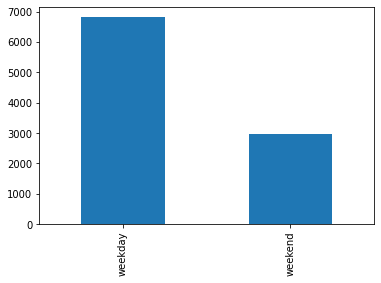

In [ ]:
# plotting a bar
#
autolib_df['day_type'].value_counts().plot.bar()

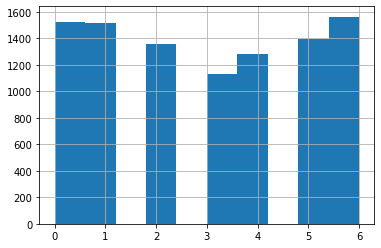

In [ ]:
# plotting a hist of the days of the week
autolib_df['dayOfWeek'].hist()


(array([4388., 2503., 1238.,  774.,  396.,  272.,  102.,   31.,   40.,
          39.]),
 array([  0. ,  29.3,  58.6,  87.9, 117.2, 146.5, 175.8, 205.1, 234.4,
        263.7, 293. ]),
 <a list of 10 Patch objects>)

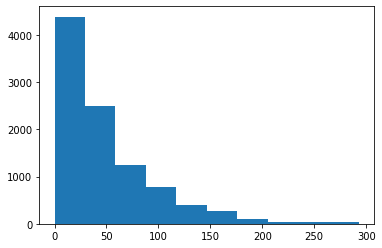

In [ ]:
# ploting a histogram of the blue cars taken
#
plt.hist(autolib_df['BlueCars_taken_sum'])

(array([4513., 2552., 1182.,  683.,  412.,  262.,   73.,   33.,   53.,
          20.]),
 array([  0. ,  30.1,  60.2,  90.3, 120.4, 150.5, 180.6, 210.7, 240.8,
        270.9, 301. ]),
 <a list of 10 Patch objects>)

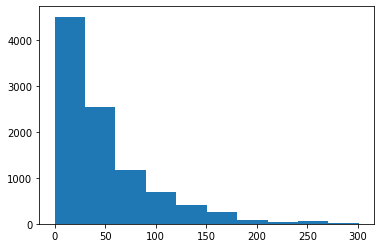

In [ ]:
# plotting a histogram of the blue cars returned
#

plt.hist(autolib_df['BlueCars_returned_sum'])

#Bivariate Analysis

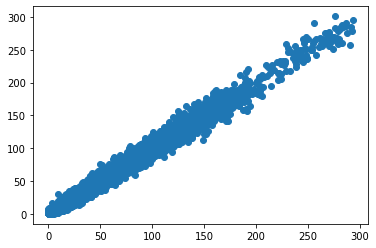

In [ ]:
# Plotting our scatterplot
plt.scatter(autolib_df['BlueCars_taken_sum'], autolib_df['BlueCars_returned_sum'])

# Displaying our scatterplot
plt.show()

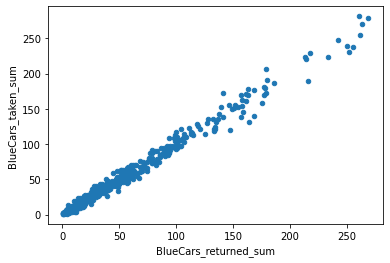

In [ ]:
# Plotting our scatterplot
autolib_df[autolib_df['Slots_taken_sum'] < 100].sample(500).plot.scatter(x='BlueCars_returned_sum', y='BlueCars_taken_sum')

# Giving our scatterplot a title
# plt.title('')

# Displaying our scatterplot
plt.show()
# there is a positive relationship between the number of blue cars returned and the bluecars taken.


#Simple Sampling technique
```



In [ ]:
# use simple sampling to randomly select 30 rows


# Selecting the sample 
autolib_sample = autolib_df.sample(n = 500, replace="True")
print(autolib_sample)



       Postal_code       date  ...  Slots_taken_sum  Total_Blue_Cars
9275         92420   4/2/2018  ...                0               24
11007        93230   6/3/2018  ...                0               57
7712         92320  3/16/2018  ...                0              138
15603        94800   6/6/2018  ...                0              161
12248        93440   3/5/2018  ...                0                6
...            ...        ...  ...              ...              ...
6526         92230  5/28/2018  ...                1              125
8888         92400  1/13/2018  ...                3              274
10747        93200  1/29/2018  ...                0               10
7099         92270  3/27/2018  ...                0               63
12462        93500   5/3/2018  ...                0               66

[500 rows x 14 columns]


In [ ]:
# previewing the dataset
#
autolib_sample.head(20)

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_Blue_Cars
9275,92420,4/2/2018,1439,0,weekday,12,12,1,1,0,0,0,0,24
11007,93230,6/3/2018,1440,6,weekend,30,27,1,1,4,3,0,0,57
7712,92320,3/16/2018,1440,4,weekday,68,70,5,3,4,3,0,0,138
15603,94800,6/6/2018,1440,2,weekday,80,81,1,2,6,7,0,0,161
12248,93440,3/5/2018,1440,0,weekday,3,3,0,0,1,0,0,0,6
15393,94700,4/2/2018,1439,0,weekday,33,43,1,0,1,0,0,0,76
11845,93370,2/13/2018,1440,1,weekday,2,2,0,0,0,0,0,0,4
4707,92110,1/30/2018,1440,1,weekday,18,19,0,0,0,0,0,0,37
8160,92350,3/5/2018,1440,0,weekday,22,24,2,2,0,2,0,0,46
15314,94700,1/10/2018,1440,2,weekday,24,27,0,0,1,1,0,0,51


In [ ]:
# check the number of rows and columns of the sampled dataset
#
autolib_sample.shape

(500, 14)

In [ ]:
# describe the dataset
#
autolib_sample.describe()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_Blue_Cars
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,93083.960000,1439.710000,2.838000,47.482000,47.486000,1.442000,1.414000,3.426000,3.512000,0.720000,0.718000,94.968000
std,986.446589,0.546349,2.085294,44.613343,44.892499,1.786903,1.773385,3.723473,3.910555,1.938328,1.946807,89.335932
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,92297.500000,1440.000000,1.000000,15.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,30.000000
50%,93110.000000,1440.000000,3.000000,33.000000,32.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,65.500000
75%,93800.000000,1440.000000,5.000000,66.000000,66.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000,129.250000
max,95880.000000,1440.000000,6.000000,281.000000,279.000000,9.000000,8.000000,20.000000,21.000000,12.000000,12.000000,558.000000


In [ ]:
# calculating the mean of the blue cars from the sample collected
#

Blue_cars_mean = autolib_sample["Total_Blue_Cars"].mean()

print(Blue_cars_mean)

94.968


In [ ]:
# calculating the standard deviation of the blue cars from the sample collected
#

Blue_cars_std = autolib_sample["Total_Blue_Cars"].std()

print(Blue_cars_std)

89.33593226461102
